In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
options(scipen=999)

# Sampling registered user revisions to plot out time difference between edits

In [5]:
sample_registered_user_revision_session_data <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/100000_sample_registered_user_revision_session_data_with_header.tsv", header=TRUE, sep="\t"))

In [6]:
sample_registered_user_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [7]:
sample_registered_user_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_registered_user_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [8]:
sample_registered_user_revision_session_data$time_difference <- as.numeric(sample_registered_user_revision_session_data$updated_timestamp - sample_registered_user_revision_session_data$updated_previous_timestamp)

In [9]:
sample_registered_user_revision_session_data$log_time_difference <- log10(sample_registered_user_revision_session_data$time_difference + 1)

In [10]:
attach(sample_registered_user_revision_session_data)

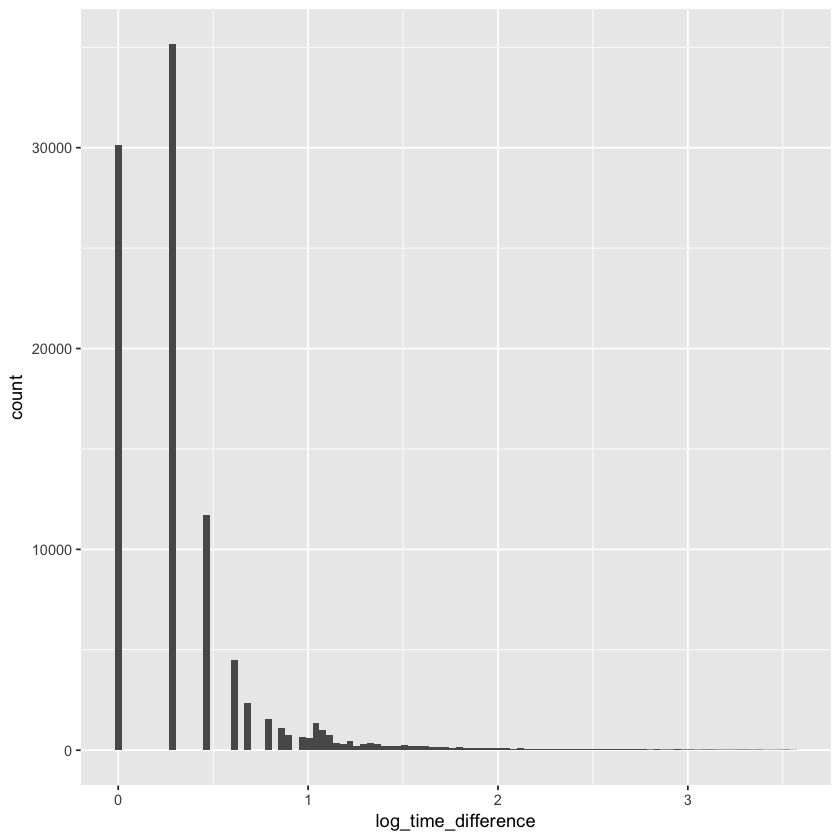

In [11]:
ggplot(sample_registered_user_revision_session_data[prev_timestamp != 'NULL',],aes(x=log_time_difference)) + geom_histogram(bins=100)

In [12]:
detach(sample_registered_user_revision_session_data)

# Sampling anon revisions to plot out time difference between edits

In [13]:
sample_anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [14]:
sample_anon_revision_session_data$updated_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [15]:
sample_anon_revision_session_data$updated_previous_timestamp <- as.POSIXct(as.character(sample_anon_revision_session_data$prev_timestamp), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [16]:
sample_anon_revision_session_data$time_difference <- as.numeric(sample_anon_revision_session_data$updated_timestamp - sample_anon_revision_session_data$updated_previous_timestamp)

In [17]:
sample_anon_revision_session_data$log_time_difference <- log10(sample_anon_revision_session_data$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [18]:
attach(sample_anon_revision_session_data)

In [19]:
sample_anon_revision_session_data_standard_deviation = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10,], user), standard_deviation = sd(log_time_difference))

In [ ]:
sample_anon_revision_session_data

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

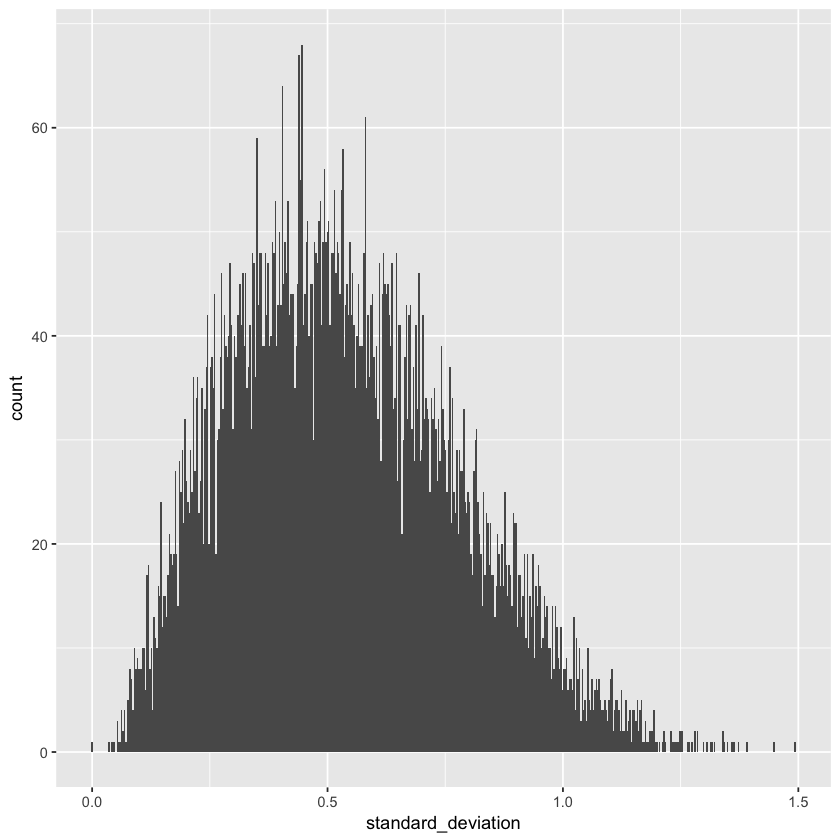

In [20]:
ggplot(sample_anon_revision_session_data_standard_deviation,aes(x=standard_deviation)) + geom_histogram(bins=500)

In [21]:
sample_anon_revision_session_data_standard_deviation[sample_anon_revision_session_data_standard_deviation$user == '150.254.210.213',]

user,standard_deviation
150.254.210.213,0.1386055


In [22]:
head(sample_anon_revision_session_data_standard_deviation[order(sample_anon_revision_session_data_standard_deviation$standard_deviation),])

user,standard_deviation
91.198.174.211,0.00000000
112.203.143.54,0.03680785
122.90.82.183,0.04117446
176.103.210.81,0.04620207
72.29.167.158,0.04863662
84.222.176.197,0.05260714


In [23]:
sample_anon_revision_session_mean = summarize(group_by(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10,], user), mean_log_time_difference = mean(log_time_difference))

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

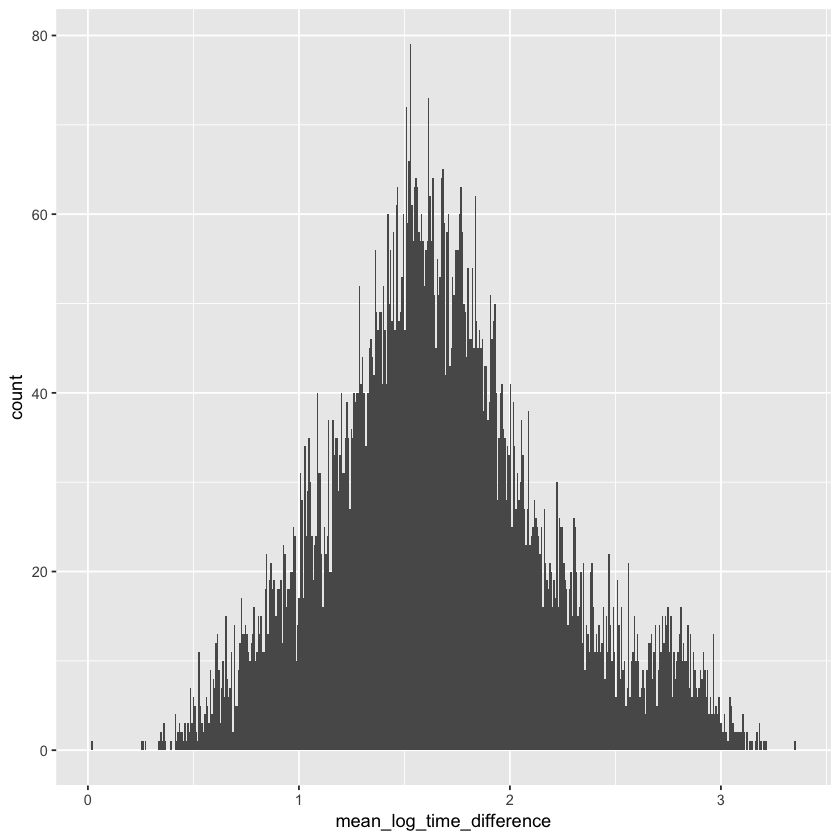

In [24]:
ggplot(sample_anon_revision_session_mean,aes(x=mean_log_time_difference)) + geom_histogram(bins=500)

In [25]:
nrow(sample_anon_revision_session_data[timestamp == prev_timestamp,])

[1] 20756

Warning message in self$trans$transform(x):
“NaNs produced”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 12109 rows containing non-finite values (stat_bin).”

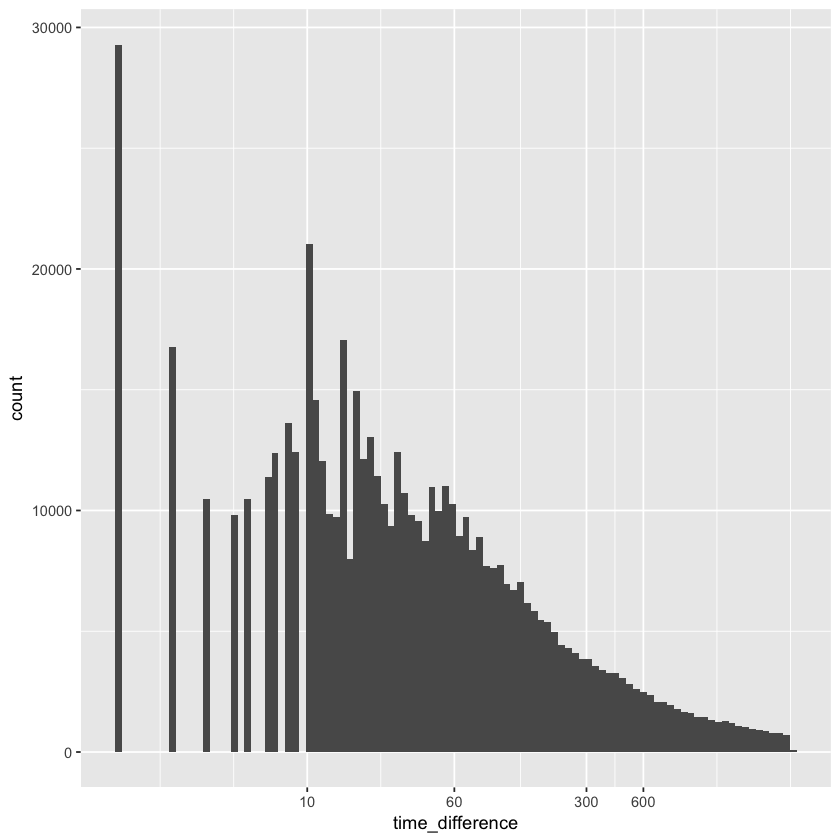

In [26]:
ggplot(sample_anon_revision_session_data[prev_timestamp != 'NULL' & session_events >= 10,],aes(x=time_difference)) + geom_histogram(bins=100) + scale_x_log10(breaks=c(10, 60, 5*60, 10*60))

In [27]:
detach(sample_anon_revision_session_data)

# Registered user event lengths

In [28]:
registered_user_mwsessions_results <- data.table(read.table("../../results/wikidata_page_revisions_with_timestamp_edit_types_and_usage/registered_user_session_data.tsv", header=TRUE, sep="\t"))

In [29]:
registered_user_mwsessions_results$start_time <- as.POSIXct(as.character(registered_user_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [30]:
registered_user_mwsessions_results$end_time <- as.POSIXct(as.character(registered_user_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [31]:
registered_user_mwsessions_results$time_difference <- as.numeric(registered_user_mwsessions_results$end_time - registered_user_mwsessions_results$start_time)

In [32]:
registered_user_mwsessions_results$log_time_difference <- log10(registered_user_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [33]:
nrow(registered_user_mwsessions_results[is.nan(registered_user_mwsessions_results$log_time_difference)])

[1] 44

In [34]:
attach(registered_user_mwsessions_results)

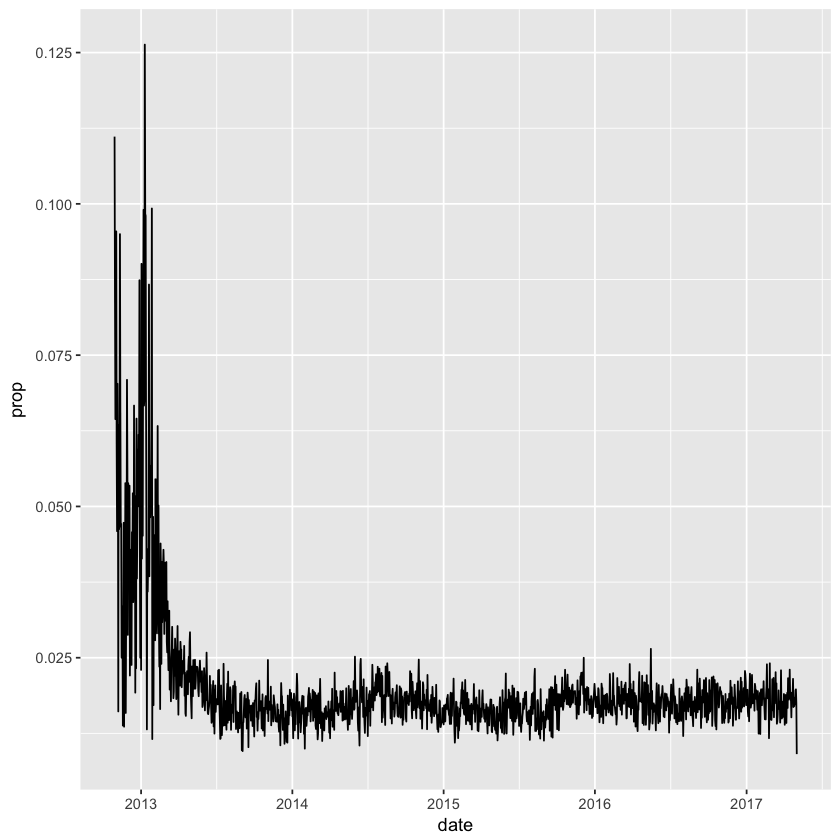

In [35]:
ggplot(registered_user_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 44 rows containing non-finite values (stat_bin).”

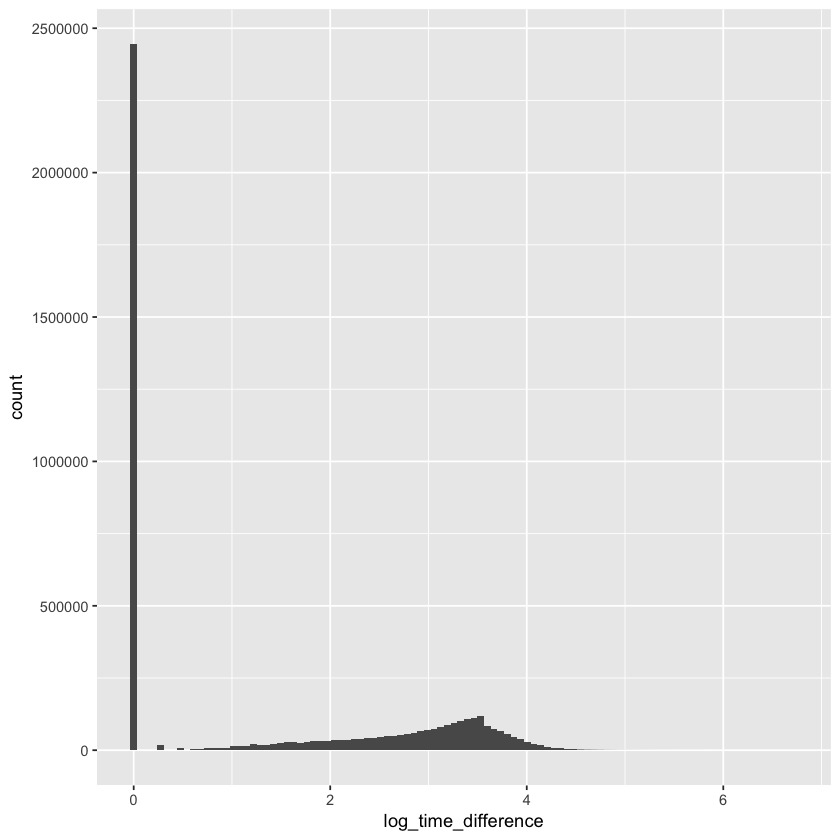

In [36]:
ggplot(registered_user_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)

In [37]:
detach(registered_user_mwsessions_results)

# Anon event lengths

In [38]:
anon_mwsessions_results <- data.table(read.table("~/Desktop/temp", header=TRUE, sep="\t"))

In [39]:
anon_mwsessions_results$start_time <- as.POSIXct(as.character(anon_mwsessions_results$start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [40]:
anon_mwsessions_results$end_time <- as.POSIXct(as.character(anon_mwsessions_results$end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [41]:
anon_mwsessions_results$time_difference <- as.numeric(anon_mwsessions_results$end_time - anon_mwsessions_results$start_time)

In [42]:
anon_mwsessions_results$log_time_difference <- log10(anon_mwsessions_results$time_difference + 1)

Warning message in eval(expr, envir, enclos):
“NaNs produced”

In [43]:
attach(anon_mwsessions_results)

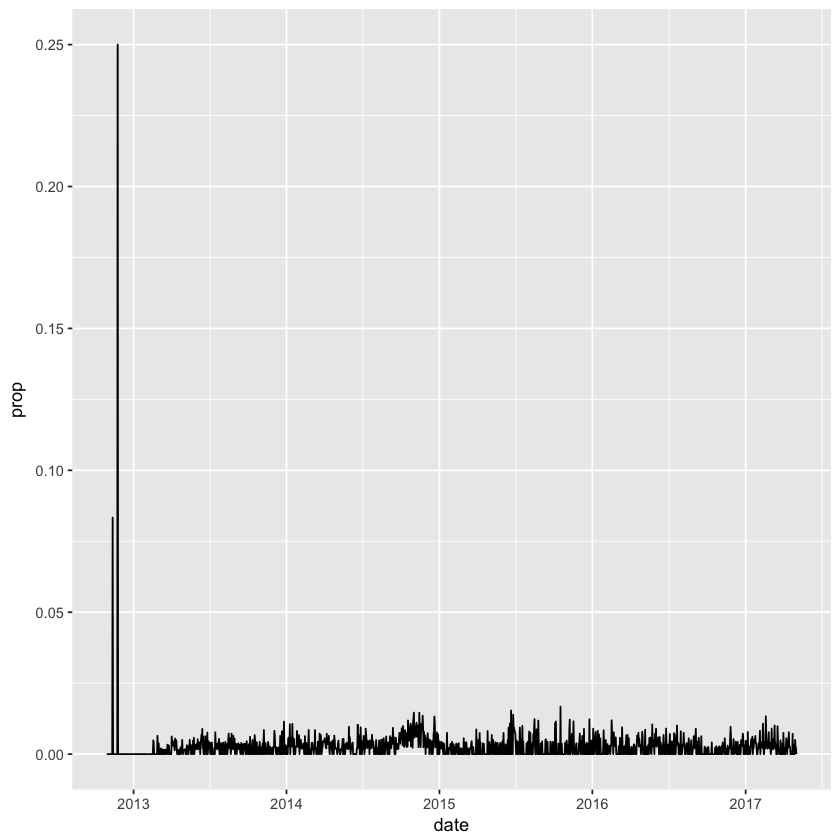

In [44]:
ggplot(anon_mwsessions_results[,
list(n=length(time_difference), prop=mean(time_difference >= 60*60*3)),
by=list(date=as.Date(start_time))], aes(x=date, y=prop)) + geom_line()

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

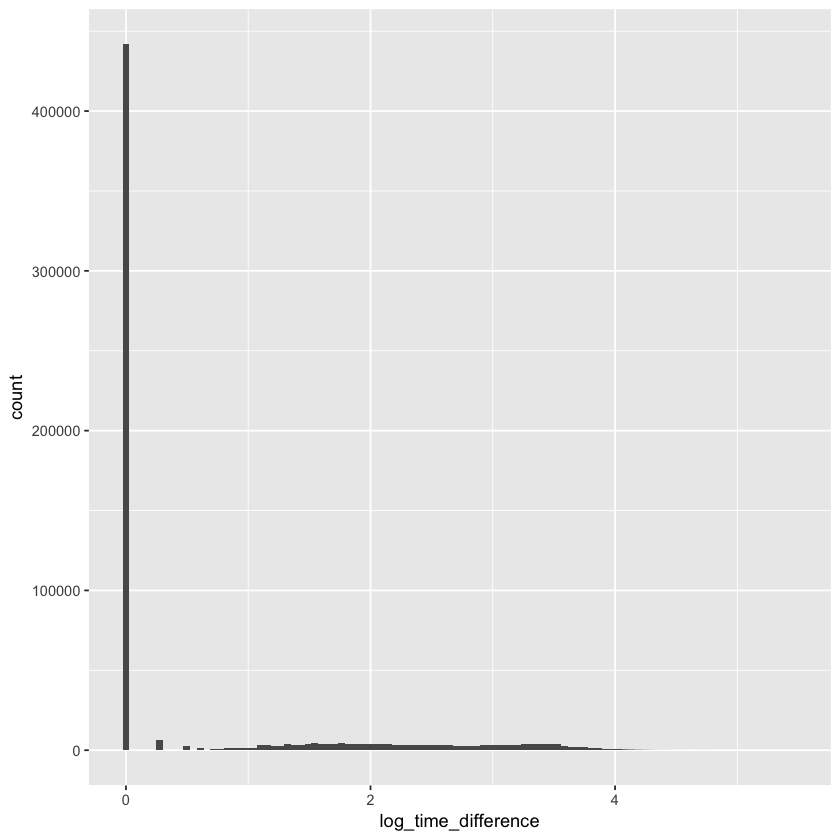

In [45]:
ggplot(anon_mwsessions_results,aes(x=log_time_difference)) + geom_histogram(bins=100)

# Anon event statistics

In [46]:
max(events)

[1] 11017

In [47]:
nrow(anon_mwsessions_results)

[1] 633128

In [48]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events==1)

In [49]:
nrow(sessions_with_more_than_10_events)

[1] 439896

In [50]:
sessions_with_more_than_10_events <- subset(anon_mwsessions_results, events>10)

In [51]:
nrow(sessions_with_more_than_10_events)

[1] 16272

In [52]:
sessions_with_more_than_20_events <- subset(anon_mwsessions_results, events>20)

In [53]:
nrow(sessions_with_more_than_20_events)

[1] 7097

In [54]:
sessions_with_more_than_50_events <- subset(anon_mwsessions_results, events>50)

In [55]:
nrow(sessions_with_more_than_50_events)

[1] 2072

In [56]:
sessions_with_more_than_100_events <- subset(anon_mwsessions_results, events>100)

In [57]:
nrow(sessions_with_more_than_100_events)

[1] 736

In [58]:
sum(anon_mwsessions_results$events)/sum(anon_mwsessions_results$events)

[1] 1

In [59]:
sum(anon_mwsessions_results$events)

[1] 1572831

In [60]:
sorted_anon_mwsessions_results <- anon_mwsessions_results[order(-events),]

In [61]:
head(sorted_anon_mwsessions_results, n=10)

user,start,end,index,events,start_time,end_time,time_difference,log_time_difference
10.68.17.174,20141123042702,20141126071956,40,11017,2014-11-23 04:27:02,2014-11-26 07:19:56,269574,5.430680
72.29.167.158,20130622114232,20130623073344,0,6971,2013-06-22 11:42:32,2013-06-23 07:33:44,71472,4.854142
185.54.115.189,20151112211127,20151113081803,0,3272,2015-11-12 21:11:27,2015-11-13 08:18:03,39996,4.602027
150.254.210.213,20130830070801,20130830235054,4,2591,2013-08-30 07:08:01,2013-08-30 23:50:54,60173,4.779409
89.122.248.53,20150821131251,20150824213721,4,2560,2015-08-21 13:12:51,2015-08-24 21:37:21,289470,5.461605
78.90.0.177,20150812232601,20150813050103,4,2538,2015-08-12 23:26:01,2015-08-13 05:01:03,20102,4.303261
87.170.223.74,20160223101534,20160224152634,1,2250,2016-02-23 10:15:34,2016-02-24 15:26:34,105060,5.021442
10.68.17.61,20141110192855,20141111003652,0,2214,2014-11-10 19:28:55,2014-11-11 00:36:52,18477,4.266655
150.254.210.213,20130701235102,20130702114051,0,2121,2013-07-01 23:51:02,2013-07-02 11:40:51,42589,4.629308
10.68.17.174,20141122054826,20141122235430,38,1865,2014-11-22 05:48:26,2014-11-22 23:54:30,65164,4.814014


In [62]:
sorted_anon_mwsessions_results[1,]$start

[1] 20141123042702

In [63]:
sorted_anon_mwsessions_results[1,]$end

[1] 20141126071956

In [64]:
sorted_anon_mwsessions_results[3,]$start

[1] 20151112211127

In [65]:
sorted_anon_mwsessions_results[3,]$end

[1] 20151113081803

In [66]:
data.table(subset(anon_mwsessions_results, user=='54.67.94.64'))[order(-events),]

user,start,end,index,events,start_time,end_time,time_difference,log_time_difference
54.67.94.64,20160409102426,20160409111917,64,7,2016-04-09 10:24:26,2016-04-09 11:19:17,3291,3.517460
54.67.94.64,20160531211027,20160531215028,103,5,2016-05-31 21:10:27,2016-05-31 21:50:28,2401,3.380573
54.67.94.64,20160601044815,20160601054316,104,4,2016-06-01 04:48:15,2016-06-01 05:43:16,3301,3.518777
54.67.94.64,20160826215757,20160826220355,154,4,2016-08-26 21:57:57,2016-08-26 22:03:55,358,2.555094
54.67.94.64,20160323045408,20160323054320,46,3,2016-03-23 04:54:08,2016-03-23 05:43:20,2952,3.470263
54.67.94.64,20160412043249,20160412044031,70,3,2016-04-12 04:32:49,2016-04-12 04:40:31,462,2.665581
54.67.94.64,20161213083038,20161213091425,220,3,2016-12-13 08:30:38,2016-12-13 09:14:25,2627,3.419625
54.67.94.64,20170122030937,20170122031758,235,3,2017-01-22 03:09:37,2017-01-22 03:17:58,501,2.700704
54.67.94.64,20160218074057,20160218083827,0,2,2016-02-18 07:40:57,2016-02-18 08:38:27,3450,3.537945
54.67.94.64,20160219054945,20160219062740,2,2,2016-02-19 05:49:45,2016-02-19 06:27:40,2275,3.357172


In [67]:
detach(anon_mwsessions_results)

# Misalignment bucketing by event by event length

In [68]:
anon_revision_session_data <- data.table(read.table("~/Desktop/revision_session_data.tsv", header=TRUE, sep="\t"))

In [69]:
anon_revision_alignment <- data.table(read.table("../../results/sql_queries/misalignment_and_edits/anon_revision_alignment.tsv", header=FALSE, sep="\t"))

In [70]:
colnames(anon_revision_alignment) <- c('entity_id','revision_id','revision_user','quality_class', 'views_class')

In [71]:
anon_revision_session_data_and_alignment <- merge(anon_revision_session_data, anon_revision_alignment, by = "revision_id")

In [72]:
anon_revision_session_data_and_alignment$start_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_start), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [73]:
anon_revision_session_data_and_alignment$end_time <- as.POSIXct(as.character(anon_revision_session_data_and_alignment$session_end), format='%Y%m%d%H%M%S', origin='1970-01-01')

In [74]:
anon_revision_session_data_and_alignment$time_difference <- anon_revision_session_data_and_alignment$end_time - anon_revision_session_data_and_alignment$start_time

# less than 10

In [75]:
less_than_10_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference < 10,], user, session_start), number_of_aligned_revisions_bucket_1 = n())

In [76]:
less_than_10_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference < 10,], user, session_start), number_of_misaligned_revisions_bucket_1 = n())

In [77]:
less_than_10 <- merge(less_than_10_aligned, less_than_10_misaligned)

In [78]:
less_than_10$proportion_aligned_bucket_1 = less_than_10$number_of_aligned_revisions/(less_than_10$number_of_misaligned_revisions + less_than_10$number_of_aligned_revisions)

# between 10 and 99 seconds time difference bucket

In [79]:
from_10_to_99_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_aligned_revisions_bucket_2 = n())

In [80]:
from_10_to_99_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 10 & time_difference < 99,], user, session_start), number_of_misaligned_revisions_bucket_2 = n())

In [81]:
from_10_to_99 <- merge(from_10_to_99_aligned, from_10_to_99_misaligned)

In [82]:
from_10_to_99$proportion_aligned_bucket_2 = from_10_to_99$number_of_aligned_revisions/(from_10_to_99$number_of_misaligned_revisions + from_10_to_99$number_of_aligned_revisions)

# between 100 and 999 seconds time difference bucket 

In [83]:
from_100_to_999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_aligned_revisions_bucket_3 = n())

In [84]:
from_100_to_999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 100 & time_difference < 999,], user, session_start), number_of_misaligned_revisions_bucket_3 = n())

In [85]:
from_100_to_999 <- merge(from_100_to_999_aligned, from_100_to_999_misaligned)

In [86]:
from_100_to_999$proportion_aligned_bucket_3 = from_100_to_999$number_of_aligned_revisions/(from_100_to_999$number_of_misaligned_revisions + from_100_to_999$number_of_aligned_revisions)

# between 1000 and 9999 seconds time difference bucket 

In [87]:
from_1000_to_9999_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_aligned_revisions_bucket_4 = n())

In [88]:
from_1000_to_9999_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference >= 1000 & time_difference < 9999,], user, session_start), number_of_misaligned_revisions_bucket_4 = n())

In [89]:
from_1000_to_9999 <- merge(from_1000_to_9999_aligned, from_1000_to_9999_misaligned)

In [90]:
from_1000_to_9999$proportion_aligned_bucket_4 = from_1000_to_9999$number_of_aligned_revisions/(from_1000_to_9999$number_of_misaligned_revisions + from_1000_to_9999$number_of_aligned_revisions)

# greater than or equal 10000 seconds time difference bucket 

In [91]:
greater_than_or_equal_10000_aligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class == views_class & time_difference > 10000,], user, session_start), number_of_aligned_revisions_bucket_5 = n())

In [92]:
greater_than_or_equal_10000_misaligned = summarize(group_by(anon_revision_session_data_and_alignment[quality_class != views_class & time_difference > 10000,], user, session_start), number_of_misaligned_revisions_bucket_5 = n())

In [93]:
greater_than_or_equal_10000 <- merge(greater_than_or_equal_10000_aligned, greater_than_or_equal_10000_misaligned)

In [94]:
greater_than_or_equal_10000$proportion_aligned_bucket_5 = greater_than_or_equal_10000$number_of_aligned_revisions/(greater_than_or_equal_10000$number_of_misaligned_revisions + greater_than_or_equal_10000$number_of_aligned_revisions)

In [95]:
head(greater_than_or_equal_10000)

user,session_start,number_of_aligned_revisions_bucket_5,number_of_misaligned_revisions_bucket_5,proportion_aligned_bucket_5
10.4.1.102,20130820110544,5,398,0.01240695
10.4.1.125,20130916104144,381,323,0.54119318
10.4.1.65,20140225000014,965,721,0.57236062
10.64.0.127,20130311224842,162,413,0.28173913
10.64.0.127,20130527091350,66,108,0.37931034
10.68.16.133,20160311194108,690,226,0.75327511


In [96]:
anon_alignment_buckets = data.table(alignment_means = c(mean(less_than_10$proportion_aligned_bucket_1),
                                                     mean(from_10_to_99$proportion_aligned_bucket_2),
                                                     mean(from_100_to_999$proportion_aligned_bucket_3),
                                                     mean(from_1000_to_9999$proportion_aligned_bucket_4),
                                                     mean(greater_than_or_equal_10000$proportion_aligned_bucket_5)))

In [97]:
head(anon_alignment_buckets)

alignment_means
0.5041298
0.4966707
0.4820898
0.4669794
0.4483662
